In [83]:
import numpy as np
from sympy import symbols, diff
from numpy.lib.scimath import sqrt as csqrt
from scipy import integrate
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sm
import numdifftools as nd
import pylab as pl
import warnings
warnings.filterwarnings("ignore")

def sisdin(f,g,Sys0,t_kiri,t_kanan,x_kiri,x_kanan,y_kiri,y_kanan,nullcline_x_1,nullcline_x_2,nullcline_y_1,nullcline_y_2,judul,simpan):
    def find_fixed_points(f,g):
        # define the system in this way (asuming a predator-prey-system with no negative values)
        # to avoid interference x = r (for resource) and y = c (for consumer) 
        r, c = sm.symbols('r, c', complex=True) #untuk sistem predator-prey ganti dengan negative=False
        R = f(r,c)
        C = g(r,c)

        # use sympy's way of setting equations to zero
        REqual = sm.Eq(R, 0)
        CEqual = sm.Eq(C, 0)

        # compute fixed points
        equilibria = sm.solve((REqual, CEqual), r, c)
        return equilibria
    
    fp = find_fixed_points(f,g)
    fp = [(float(i[0]),float(i[1])) for i in fp]  
    print(fp,'\n')
    
    #nanti tambahin kasus saat eigen nya kompleks dinamik pelinierannya bagaimana
    def eigenvalues(x,y):
        function = lambda x: np.vstack((f(x[0],x[1]),g(x[0],x[1])))
        x0 = np.array([[x],[y]])
        def derivative(function,x0):
            jacobian = nd.Jacobian(function)(x0)
            return jacobian
            
        a11 = derivative(function,x0)[0][0]    # differentiated f with respect to x
        a12 = derivative(function,x0)[0][1]    # differentiated f with respect to y
        a21 = derivative(function,x0)[1][0]    # differentiated g with respect to x
        a22 = derivative(function,x0)[1][1]    # differentiated g with respect to y

        tr = a11 + a22
        det = a11*a22 - a12*a21
        lambda1 = (tr - csqrt(tr**2 - 4*det))/2
        lambda2 = (tr + csqrt(tr**2 - 4*det))/2
        print('Check the fixed point  (%.5f, %.5f)' % (x,y)) 
        print('The real part of the first eigenvalue is %f' %lambda1.real)
        print('The real part of the second eigenvalue is %f' % lambda2.real)    

        if (lambda1.real < 0 and lambda2.real < 0):
            print('The fixed point in (%.5f, %.5f) is a sink. It is stable' % (x,y))
        if (lambda1.real > 0 and lambda2.real > 0):
            print('The fixed point in (%.5f, %.5f) is a source. It is unstable' % (x,y))
        if (lambda1.real > 0 and lambda2.real < 0):
            print('The fixed point in (%.5f, %.5f) is a saddle. It is unstable' % (x,y))
        if (lambda1.real < 0 and lambda2.real > 0):
            print('The fixed point in (%.5f, %.5f) is unstable' % (x,y))
        print('Jacobian in point (%.5f, %.5f) = \n'%(x,y), derivative(function,x0))
        print('-------------------------------------------------------------')
        return lambda1, lambda2
    
    # iterate through list of fixed points
    for x,y in fp:
        eigenvalues(x,y)   
    print('\n')
    
    # define system in terms of a Numpy array
    def Sys(X, t=0):
        return np.array([f(X[0],X[1]),g(X[0],X[1])])
    
    def predatorpreyplot(Sys,Sys0,t_kiri,t_kanan):
        # generate 1000 linearly spaced numbers for x-axes
        t = np.linspace(t_kiri, t_kanan, 1000)
        # initial values for Sys0

        # type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
        X, infodict = integrate.odeint(Sys, Sys0, t, atol=1e-7, rtol=1e-11, mxstep=5000, full_output=True)
        infodict['message']                      # integration successful

        x,y = X.T

        #plot
        fig, ax = plt.subplots(1,2, figsize=(13,6), dpi=100)
        fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
     
        ax[0].plot(x, 'r-', label='predator')
        ax[0].plot(y, 'b-', label='prey')
        ax[0].set_title("Dynamics in time")
        ax[0].set_xlabel("time")
        ax[0].grid()
        ax[0].legend(loc='best')

        ax[1].plot(x, y, color="blue")
        ax[1].set_xlabel("x")
        ax[1].set_ylabel("y", rotation=0)  
        ax[1].set_title("Phase space")
        ax[1].grid()
        
        return plt.show()
#     predatorpreyplot(Sys,Sys0,t_kiri,t_kanan)   #comment jika tidak ingin menampilkan plot predator-prey
    
    def quiverplotnullcline(Sys,fp,x_kiri,x_kanan,y_kiri,y_kanan,nullcline_x_1,nullcline_x_2,nullcline_y_1,nullcline_y_2,judul,simpan):
        #plot
        fig, ax2 = plt.subplots(figsize=(12,8), dpi=100)
        
        # orbit tambahan (jika diperlukan bisa ditambahkan) 
        # untuk kasus contoh plot dibawah dengan nilai epsilon saya comment line 112-132
        warna = ['g','k','m','y','c']
        n = len(warna)-1
        for i in range(3):    #range nya bisa diatur atur dari 1-5
            ts = [np.linspace(0,5*x_kanan,100), 
                  np.linspace(5*x_kiri,0,100),
                  np.linspace(5*x_kiri,5*x_kanan,100),
                  np.linspace(0,0,100),
                  np.linspace(100*x_kiri,100*x_kanan,5) 
                 ]
            ic1 = np.linspace(-2,2,3)   #bagian ini dapat diubah ubah sesuai kebutuhan
            for p in ic1:
                for q in ic1:
                    x0 = [p,q]
                    xs = integrate.odeint(Sys, x0, ts[i], atol=1e-7, rtol=1e-11, mxstep=5000)
                    ax2.plot(xs[:,0],xs[:,1], warna[i]+'-') 
            ic2 = np.linspace(-3,5,3)   #line 127-132 ini dapat di comment/uncomment sesuai kebutuhan
            for p in ic2:           
                for q in ic2:
                    x0 = [p,q]
                    xs = integrate.odeint(Sys, x0, ts[i], atol=1e-7, rtol=1e-11, mxstep=5000)
                    ax2.plot(xs[:,0],xs[:,1], warna[n-i]+'-') 

        plt.xlim(x_kiri, x_kanan)
        plt.ylim(y_kiri, y_kanan)
        
        x = np.linspace(x_kiri, x_kanan, 100)
        y = np.linspace(y_kiri, y_kanan, 100)

        # plot nullclines    #comment 2 kode dibawah jika tidak menggunakan nullcline
        ax2.plot(nullcline_x_1(x,y),nullcline_x_2(x,y), 'r-', lw=2, label='x-nullcline')
        ax2.plot(nullcline_y_1(x,y),nullcline_y_2(x,y), 'b-', lw=2, label='y-nullcline')
        ax2.legend(loc='best')
        # plot nullcline khusus untuk kasus contoh 2
#         ax2.plot(nullcline_x_1(x,y),nullcline_x_2[0](x,y), 'r-', lw=2, label='x-nullcline')
#         ax2.plot(nullcline_x_1(x,y),nullcline_x_2[1](x,y), 'r-', lw=2, label='x-nullcline')
#         ax2.plot(nullcline_x_1(x,y),nullcline_x_2[2](x,y), 'r-', lw=2, label='x-nullcline')
#         ax2.plot(nullcline_y_1(x,y),nullcline_y_2(x,y), 'b-', lw=2, label='y-nullcline')
#         ax2.legend(loc='best')
    
        # plot fixed points
        for point in fp:
            ax2.plot(point[0],point[1], "black", marker = "o", markersize = 10.0)
        ax2.set_title(judul)
        ax2.grid()
        ax2.set_xlabel('$\mathbf{x}$').set_fontsize(15)
        ax2.set_ylabel('$\mathbf{y}$', rotation = 0).set_fontsize(15)

        x = np.linspace(x_kiri, x_kanan, 20)
        y = np.linspace(y_kiri, y_kanan, 20)
        
        # Quiver Plot
        # define a grid and compute direction at each point
        X1 , Y1  = np.meshgrid(x, y)                    # create a grid
        DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
        M = (np.hypot(DX1, DY1))                        # norm growth rate 
        M[ M == 0] = 1.                                 # avoid zero division errors 
        DX1 /= M                                        # normalize each arrows
        DY1 /= M

        Q = pl.quiver(X1, Y1, DX1, DY1, M, pivot='tip', units='width')
        qk = ax2.quiverkey(Q, 0.9, 0.9, 1, r'orbit', labelpos='E', coordinates='figure')

        # Stream Plot   #warna dapat diganti ganti cmap=autumn/Greens
        ax2.streamplot(X1, Y1, DX1, DY1, color=np.linalg.norm(np.dstack([DX1, DY1]), axis=-1), cmap='Greens', density=2, linewidth=1.5)
        
        if simpan == True:
            ax2.set_rasterized(True)
            fig.savefig('potretfasa{}.png'.format(judul), bbox_inches="tight", format='png', dpi=1000)
        return plt.show()
    quiverplotnullcline(Sys,fp,x_kiri,x_kanan,y_kiri,y_kanan,nullcline_x_1,nullcline_x_2,nullcline_y_1,nullcline_y_2,judul,simpan) 

[(-1.7320508075688772, 0.0), (0.0, 0.0), (1.7320508075688772, 0.0)] 

Check the fixed point  (-1.73205, 0.00000)
The real part of the first eigenvalue is -1.000000
The real part of the second eigenvalue is -0.750000
The fixed point in (-1.73205, 0.00000) is a sink. It is stable
Jacobian in point (-1.73205, 0.00000) = 
 [[ 0.    1.  ]
 [-0.75 -1.75]]
-------------------------------------------------------------
Check the fixed point  (0.00000, 0.00000)
The real part of the first eigenvalue is -1.618034
The real part of the second eigenvalue is 0.618034
The fixed point in (0.00000, 0.00000) is unstable
Jacobian in point (0.00000, 0.00000) = 
 [[ 0.  1.]
 [ 1. -1.]]
-------------------------------------------------------------
Check the fixed point  (1.73205, 0.00000)
The real part of the first eigenvalue is -1.000000
The real part of the second eigenvalue is -0.750000
The fixed point in (1.73205, 0.00000) is a sink. It is stable
Jacobian in point (1.73205, 0.00000) = 
 [[ 0.    1.  ]
 [-

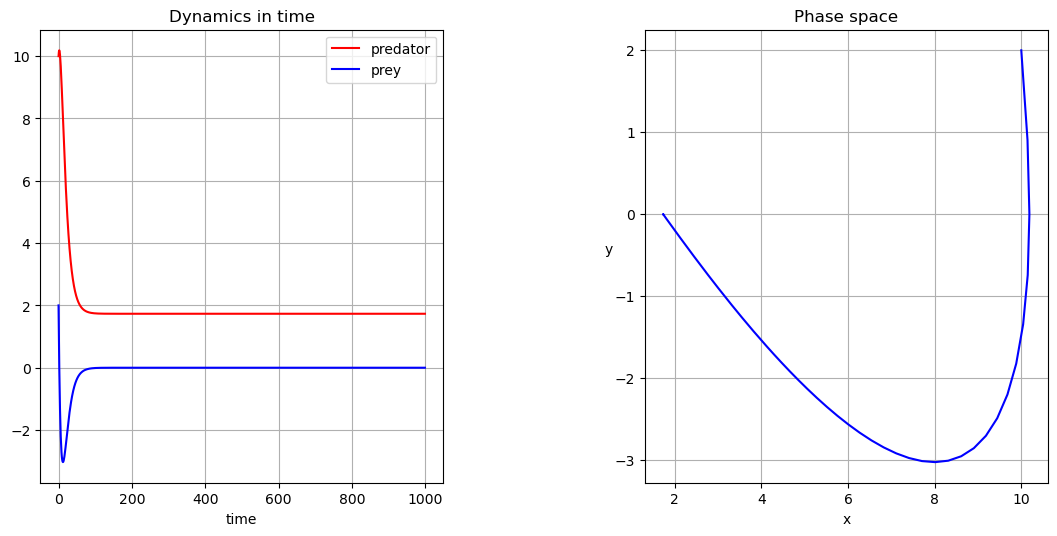

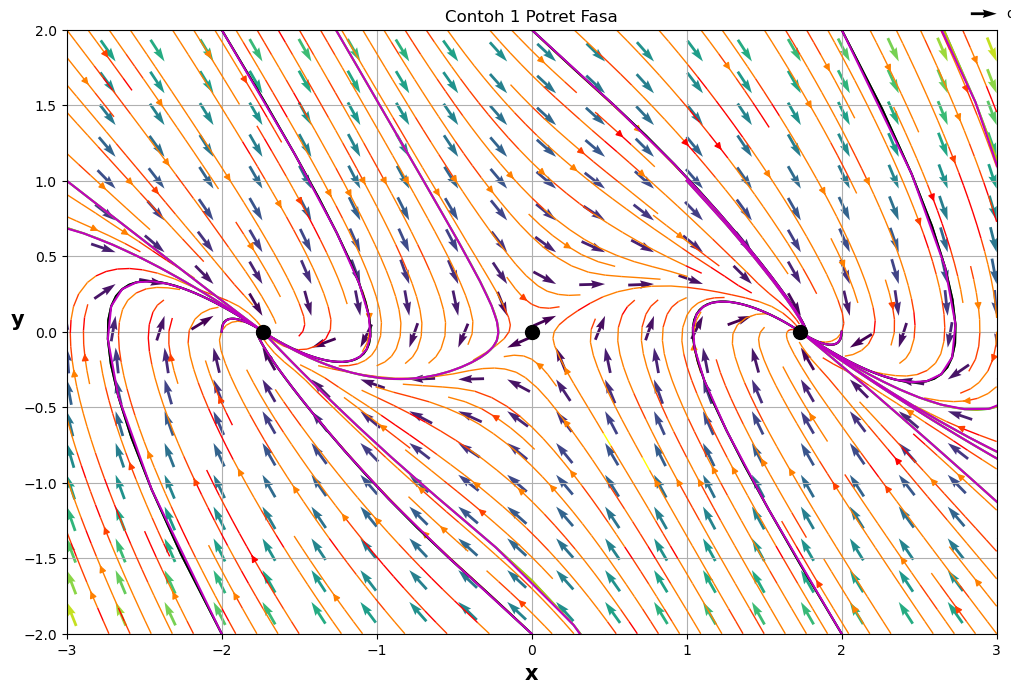

In [25]:
delta = .5; mu = 2; c = 1 
f = lambda y,p : p                                                       #dx/dt
g = lambda y,p : -2*delta*p-y*(1-mu/(y**2+1)**.5)-(c*y**2*p)/(y**2+1)    #dy/dt
Sys0 = np.array([10, 2])                                                 #inisial awal dalam menggambar plot predator prey
t_kiri, t_kanan = 0,100                                                  #waktu awal hingga akhir dalam menggambar plot predator prey
x_kiri,x_kanan,y_kiri,y_kanan = -3,3,-2,2                                #interval x dan y dalam menggambar potrait phase
nullcline_x_1,nullcline_x_2 = lambda x,y: 0*x, lambda x,y: 0*x           #plot nullcline dari x diperoleh saat dx/dt=0
nullcline_y_1,nullcline_y_2 = lambda x,y: 0*x, lambda x,y: 0*x           #plot nullcline dari y diperoleh saat dy/dt=0
judul = 'Contoh 1 Potret Fasa'
simpan = False                                                           #simpan gambar True/False

sisdin(f,g,Sys0,t_kiri,t_kanan,x_kiri,x_kanan,y_kiri,y_kanan,nullcline_x_1,nullcline_x_2,nullcline_y_1,nullcline_y_2,judul,simpan)

[(0.0, 0.0), (1.0, 1.0), (2.0, 0.0)] 

Check the fixed point  0.0, 0.0
The real part of the first eigenvalue is -0.9999999999999999
The real part of the second eigenvalue is 1.9999999999999996
The fixed point in 0.0, 0.0 is unstable
-------------------------------------------------------------
Check the fixed point  1.0, 1.0
The real part of the first eigenvalue is -0.4999999999999999
The real part of the second eigenvalue is -0.4999999999999999
The fixed point in 1.0, 1.0 is a sink. It is stable
-------------------------------------------------------------
Check the fixed point  2.0, 0.0
The real part of the first eigenvalue is -1.9999999999999996
The real part of the second eigenvalue is 0.9999999999999999
The fixed point in 2.0, 0.0 is unstable
-------------------------------------------------------------




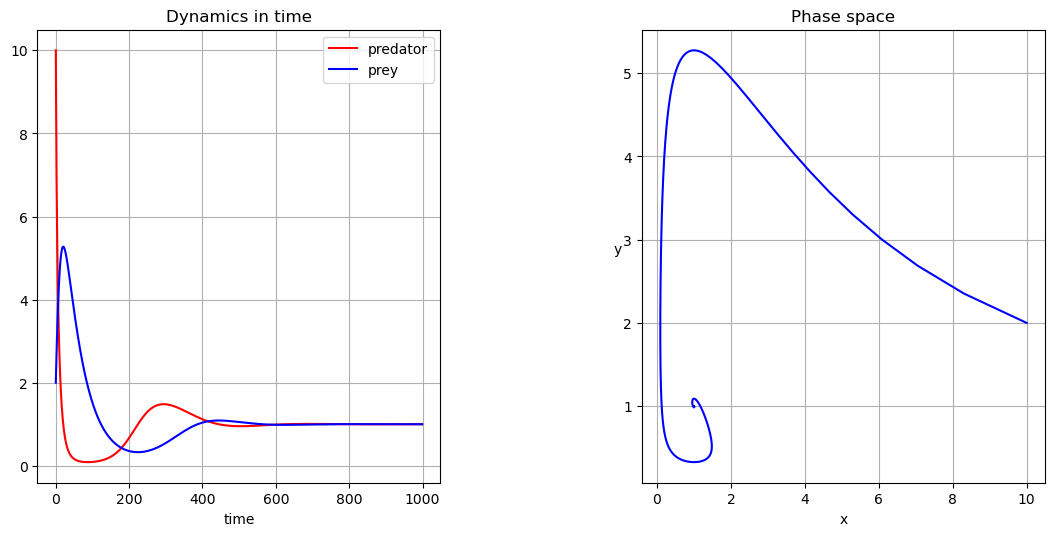

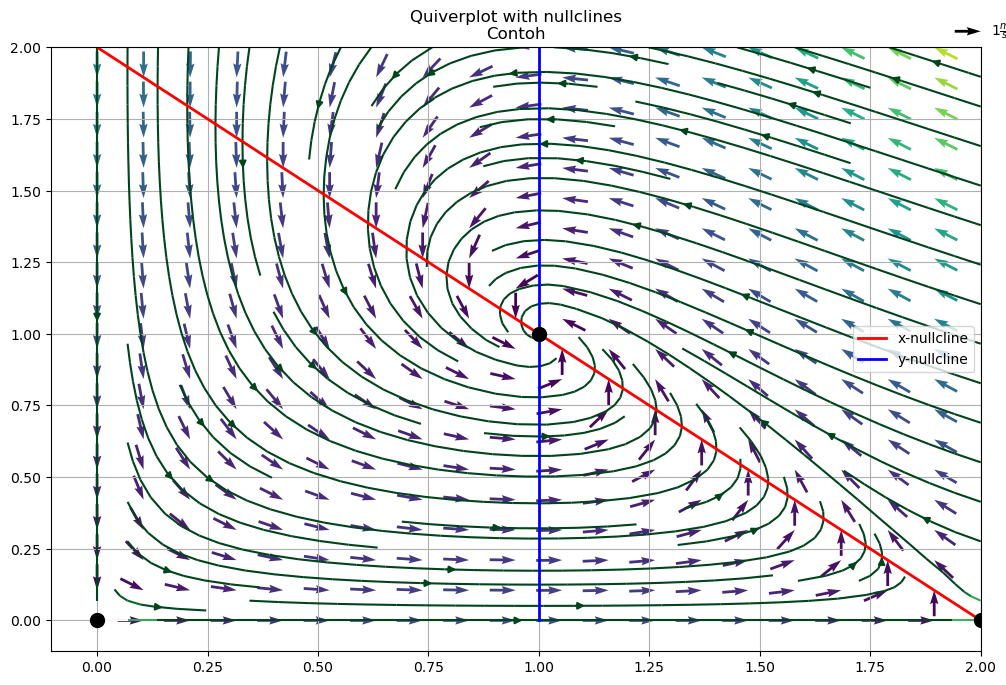

In [12]:
f = lambda x,y : 2*x-x**2-x*y                      #dx/dt 
g = lambda x,y : -y+x*y                            #dy/dt
r = 10                                             #persekitaran nilai r atau -r<x,y<r untuk mencari titik tetap
Sys0 = np.array([10, 2])                           #inisial awal dalam menggambar plot predator prey
t_kiri, t_kanan = 0,20                             #waktu awal hingga akhir dalam menggambar plot predator prey
x_kiri,x_kanan,y_kiri,y_kanan = 0,2,0,2            #interval x dan y dalam menggambar potrait phase
nullcline_x_1,nullcline_x_2 = lambda x,y: x, lambda x,y: -x+2           #titik-titik nullcline dari x diperoleh saat dx/dt=0
nullcline_y_1,nullcline_y_2 = lambda x,y: 1+0*x, lambda x,y: y          #titik-titik nullcline dari y diperoleh saat dy/dt=0
judul = 'Quiverplot with nullcline \n Contoh'
simpan = False                                     #simpan gambar True/False

sisdin(f,g,Sys0,t_kiri,t_kanan,x_kiri,x_kanan,y_kiri,y_kanan,nullcline_x_1,nullcline_x_2,nullcline_y_1,nullcline_y_2,judul,simpan)

[(-4.0, -4.0), (0.0, 0.0)] 

Check the fixed point  (-4.00000, -4.00000)
The real part of the first eigenvalue is -1.500000
The real part of the second eigenvalue is -1.500000
The fixed point in (-4.00000, -4.00000) is a sink. It is stable
Jacobian in point (-4.00000, -4.00000) = 
 [[-4.  8.]
 [-1.  1.]]
-------------------------------------------------------------
Check the fixed point  (0.00000, 0.00000)
The real part of the first eigenvalue is -4.000000
The real part of the second eigenvalue is 1.000000
The fixed point in (0.00000, 0.00000) is unstable
Jacobian in point (0.00000, 0.00000) = 
 [[-4.  0.]
 [-1.  1.]]
-------------------------------------------------------------




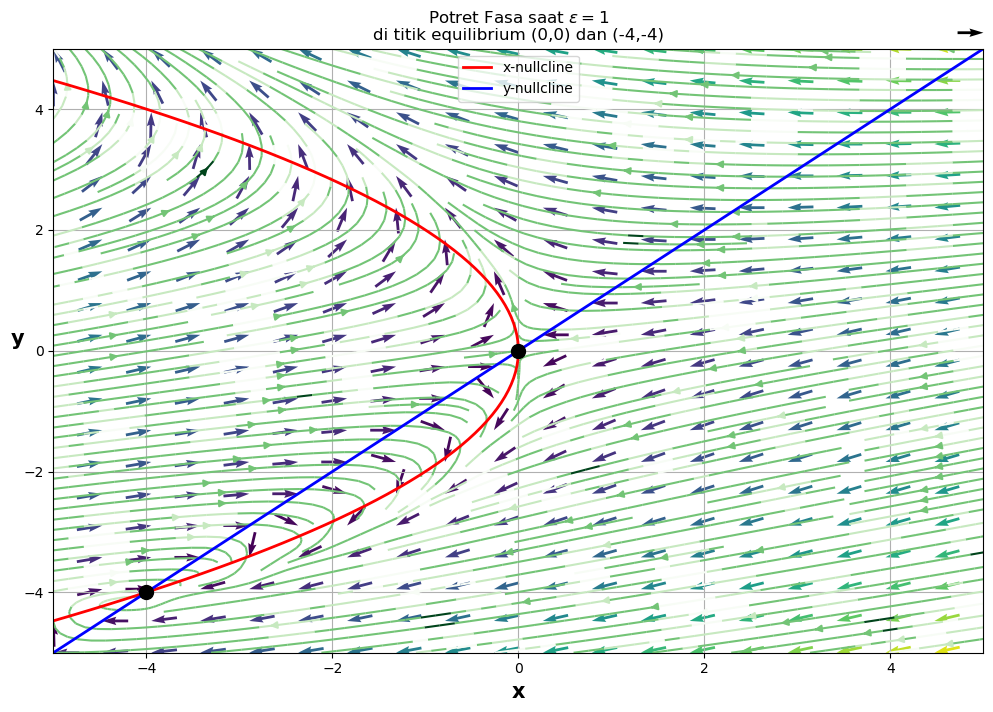

In [18]:
epsilon = 1
f = lambda x,y : -2*(1+epsilon)*x-y**2               #dx/dt
g = lambda x,y : -x+(2*epsilon-1)*y                  #dy/dt
Sys0 = np.array([0, 0])                              #inisial awal dalam menggambar plot predator prey
t_kiri, t_kanan = 0,100                              #waktu awal hingga akhir dalam menggambar plot predator prey
x_kiri,x_kanan,y_kiri,y_kanan = -5,5,-5,5            #interval x dan y dalam menggambar potrait phase
nullcline_x_1,nullcline_x_2 = lambda x,y: -y**2/(2+2*epsilon), lambda x,y: y     #titik-titik nullcline dari x diperoleh saat dx/dt=0
nullcline_y_1,nullcline_y_2 = lambda x,y: x, lambda x,y: x/(2*epsilon-1)         #titik-titik nullcline dari y diperoleh saat dy/dt=0
judul = "Potret Fasa saat $\epsilon = {}$".format(epsilon)+'\ndi titik equilibrium (0,0) dan ({},{})'.format(-2*(1+epsilon)*(2*epsilon-1)**2
                                                      ,-2*(1+epsilon)*(2*epsilon-1))
simpan = False                                       #simpan gambar True/False

sisdin(f,g,Sys0,t_kiri,t_kanan,x_kiri,x_kanan,y_kiri,y_kanan,nullcline_x_1,nullcline_x_2,nullcline_y_1,nullcline_y_2,judul,simpan)

[(-0.875, -1.75), (0.0, 0.0)] 

Check the fixed point  (-0.87500, -1.75000)
The real part of the first eigenvalue is -2.207107
The real part of the second eigenvalue is -0.792893
The fixed point in (-0.87500, -1.75000) is a sink. It is stable
Jacobian in point (-0.87500, -1.75000) = 
 [[-3.5  3.5]
 [-1.   0.5]]
-------------------------------------------------------------
Check the fixed point  (0.00000, 0.00000)
The real part of the first eigenvalue is -3.500000
The real part of the second eigenvalue is 0.500000
The fixed point in (0.00000, 0.00000) is unstable
Jacobian in point (0.00000, 0.00000) = 
 [[-3.5  0. ]
 [-1.   0.5]]
-------------------------------------------------------------




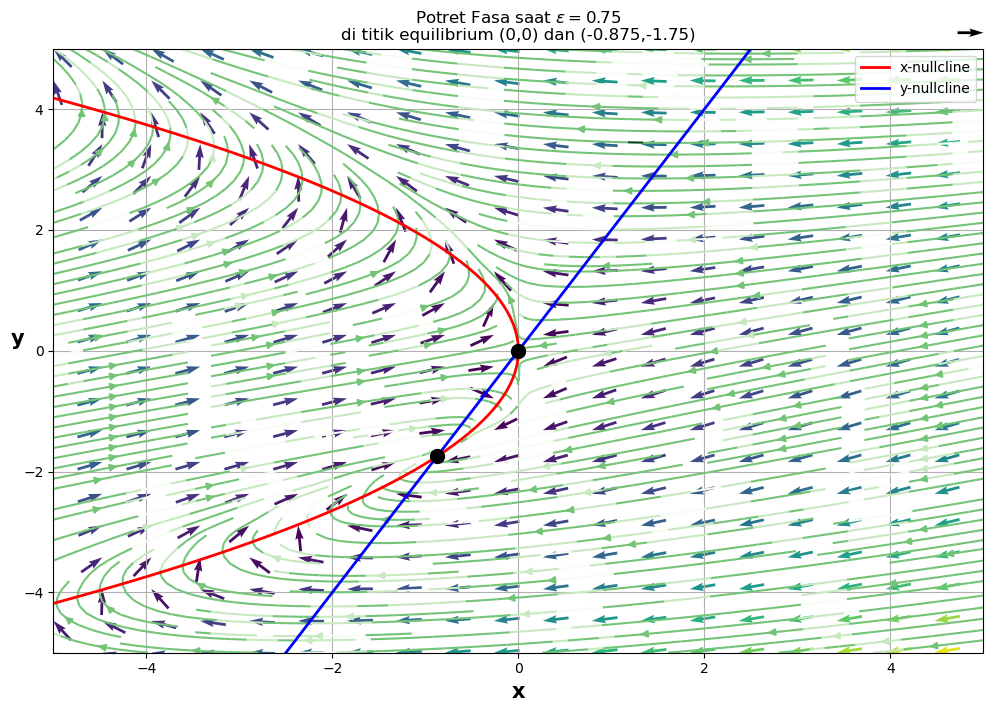

In [19]:
epsilon = 0.75
f = lambda x,y : -2*(1+epsilon)*x-y**2               #dx/dt
g = lambda x,y : -x+(2*epsilon-1)*y                  #dy/dt
Sys0 = np.array([0, 0])                              #inisial awal dalam menggambar plot predator prey
t_kiri, t_kanan = 0,100                              #waktu awal hingga akhir dalam menggambar plot predator prey
x_kiri,x_kanan,y_kiri,y_kanan = -5,5,-5,5            #interval x dan y dalam menggambar potrait phase
nullcline_x_1,nullcline_x_2 = lambda x,y: -y**2/(2+2*epsilon), lambda x,y: y     #titik-titik nullcline dari x diperoleh saat dx/dt=0
nullcline_y_1,nullcline_y_2 = lambda x,y: x, lambda x,y: x/(2*epsilon-1)         #titik-titik nullcline dari y diperoleh saat dy/dt=0
judul = "Potret Fasa saat $\epsilon = {}$".format(epsilon)+'\ndi titik equilibrium (0,0) dan ({},{})'.format(-2*(1+epsilon)*(2*epsilon-1)**2
                                                      ,-2*(1+epsilon)*(2*epsilon-1))
simpan = False                                       #simpan gambar True/False

sisdin(f,g,Sys0,t_kiri,t_kanan,x_kiri,x_kanan,y_kiri,y_kanan,nullcline_x_1,nullcline_x_2,nullcline_y_1,nullcline_y_2,judul,simpan)

[(-2.0, 2.0), (0.0, 0.0)] 

Check the fixed point  (-2.00000, 2.00000)
The real part of the first eigenvalue is -3.561553
The real part of the second eigenvalue is 0.561553
The fixed point in (-2.00000, 2.00000) is unstable
Jacobian in point (-2.00000, 2.00000) = 
 [[-2. -4.]
 [-1. -1.]]
-------------------------------------------------------------
Check the fixed point  (0.00000, 0.00000)
The real part of the first eigenvalue is -2.000000
The real part of the second eigenvalue is -1.000000
The fixed point in (0.00000, 0.00000) is a sink. It is stable
Jacobian in point (0.00000, 0.00000) = 
 [[-2.  0.]
 [-1. -1.]]
-------------------------------------------------------------




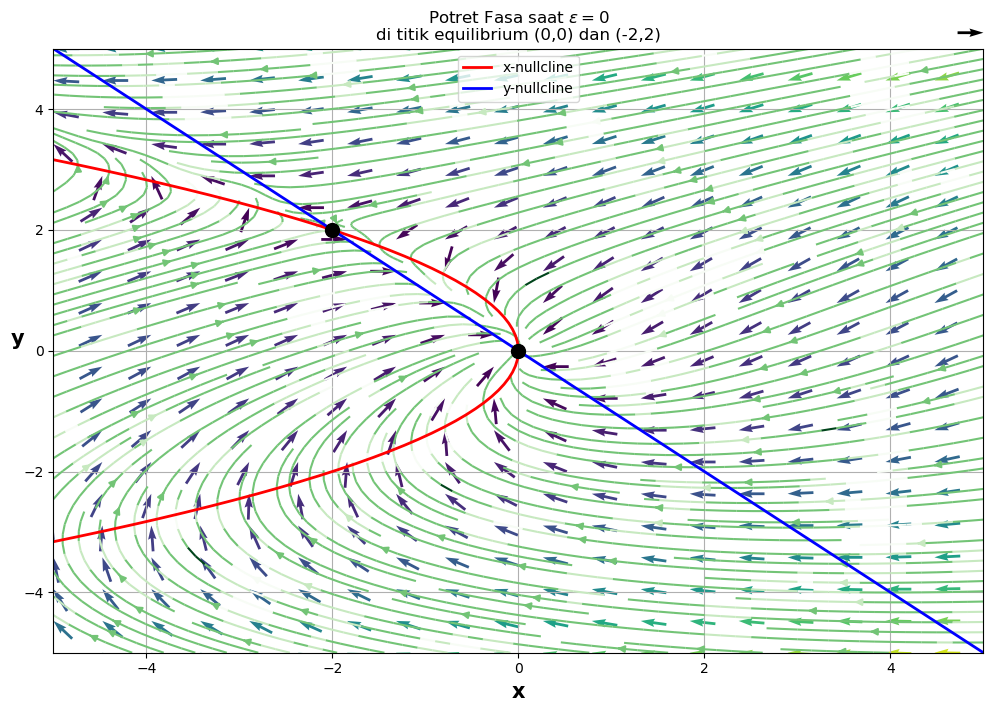

In [20]:
epsilon = 0
f = lambda x,y : -2*(1+epsilon)*x-y**2               #dx/dt
g = lambda x,y : -x+(2*epsilon-1)*y                  #dy/dt
Sys0 = np.array([0, 0])                              #inisial awal dalam menggambar plot predator prey
t_kiri, t_kanan = 0,100                              #waktu awal hingga akhir dalam menggambar plot predator prey
x_kiri,x_kanan,y_kiri,y_kanan = -5,5,-5,5            #interval x dan y dalam menggambar potrait phase
nullcline_x_1,nullcline_x_2 = lambda x,y: -y**2/(2+2*epsilon), lambda x,y: y     #titik-titik nullcline dari x diperoleh saat dx/dt=0
nullcline_y_1,nullcline_y_2 = lambda x,y: x, lambda x,y: x/(2*epsilon-1)         #titik-titik nullcline dari y diperoleh saat dy/dt=0
judul = "Potret Fasa saat $\epsilon = {}$".format(epsilon)+'\ndi titik equilibrium (0,0) dan ({},{})'.format(-2*(1+epsilon)*(2*epsilon-1)**2
                                                      ,-2*(1+epsilon)*(2*epsilon-1))
simpan = False                                       #simpan gambar True/False

sisdin(f,g,Sys0,t_kiri,t_kanan,x_kiri,x_kanan,y_kiri,y_kanan,nullcline_x_1,nullcline_x_2,nullcline_y_1,nullcline_y_2,judul,simpan)

[(0.0, 0.0), (6.125, -1.75)] 

Check the fixed point  (0.00000, 0.00000)
The real part of the first eigenvalue is -3.500000
The real part of the second eigenvalue is 0.500000
The fixed point in (0.00000, 0.00000) is unstable
Jacobian in point (0.00000, 0.00000) = 
 [[ 0.5  0. ]
 [-1.  -3.5]]
-------------------------------------------------------------
Check the fixed point  (6.12500, -1.75000)
The real part of the first eigenvalue is -2.207107
The real part of the second eigenvalue is -0.792893
The fixed point in (6.12500, -1.75000) is a sink. It is stable
Jacobian in point (6.12500, -1.75000) = 
 [[ 0.5  3.5]
 [-1.  -3.5]]
-------------------------------------------------------------




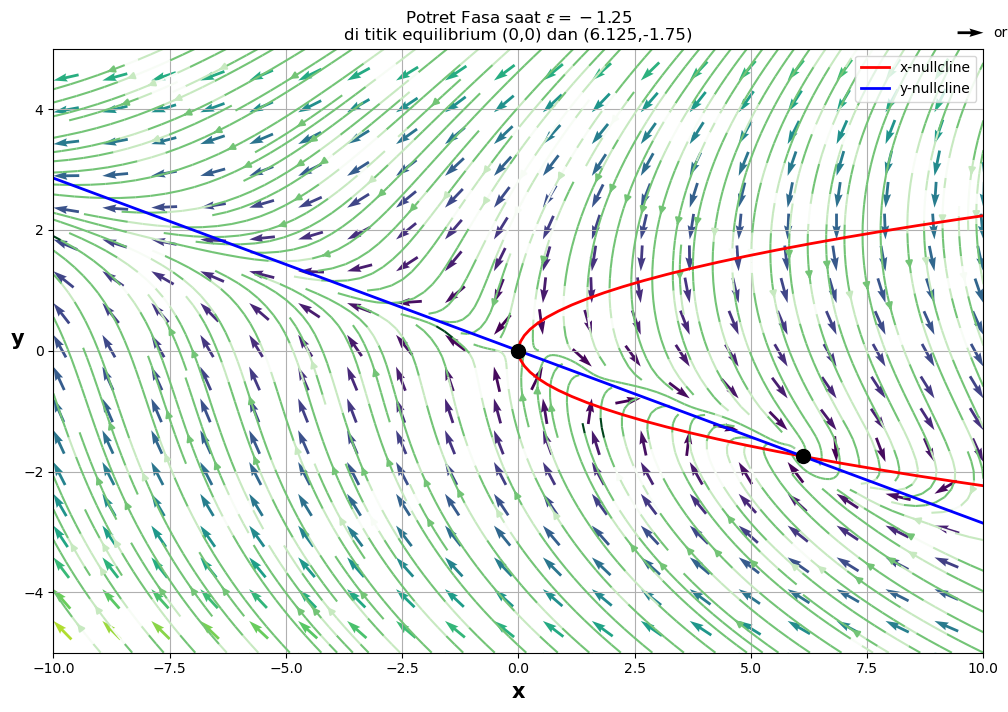

In [21]:
epsilon = -1.25
f = lambda x,y : -2*(1+epsilon)*x-y**2               #dx/dt
g = lambda x,y : -x+(2*epsilon-1)*y                  #dy/dt
Sys0 = np.array([0, 0])                              #inisial awal dalam menggambar plot predator prey
t_kiri, t_kanan = 0,100                              #waktu awal hingga akhir dalam menggambar plot predator prey
x_kiri,x_kanan,y_kiri,y_kanan = -10,10,-5,5          #interval x dan y dalam menggambar potrait phase
nullcline_x_1,nullcline_x_2 = lambda x,y: -y**2/(2+2*epsilon), lambda x,y: y     #titik-titik nullcline dari x diperoleh saat dx/dt=0
nullcline_y_1,nullcline_y_2 = lambda x,y: x, lambda x,y: x/(2*epsilon-1)         #titik-titik nullcline dari y diperoleh saat dy/dt=0
judul = "Potret Fasa saat $\epsilon = {}$".format(epsilon)+'\ndi titik equilibrium (0,0) dan ({},{})'.format(-2*(1+epsilon)*(2*epsilon-1)**2
                                                      ,-2*(1+epsilon)*(2*epsilon-1))
simpan = False                                       #simpan gambar True/False

sisdin(f,g,Sys0,t_kiri,t_kanan,x_kiri,x_kanan,y_kiri,y_kanan,nullcline_x_1,nullcline_x_2,nullcline_y_1,nullcline_y_2,judul,simpan)

[(0.0, 0.0), (50.0, -10.0)] 

Check the fixed point  (0.00000, 0.00000)
The real part of the first eigenvalue is -5.000000
The real part of the second eigenvalue is 2.000000
The fixed point in (0.00000, 0.00000) is unstable
Jacobian in point (0.00000, 0.00000) = 
 [[ 2.  0.]
 [-1. -5.]]
-------------------------------------------------------------
Check the fixed point  (50.00000, -10.00000)
The real part of the first eigenvalue is -1.500000
The real part of the second eigenvalue is -1.500000
The fixed point in (50.00000, -10.00000) is a sink. It is stable
Jacobian in point (50.00000, -10.00000) = 
 [[ 2. 20.]
 [-1. -5.]]
-------------------------------------------------------------




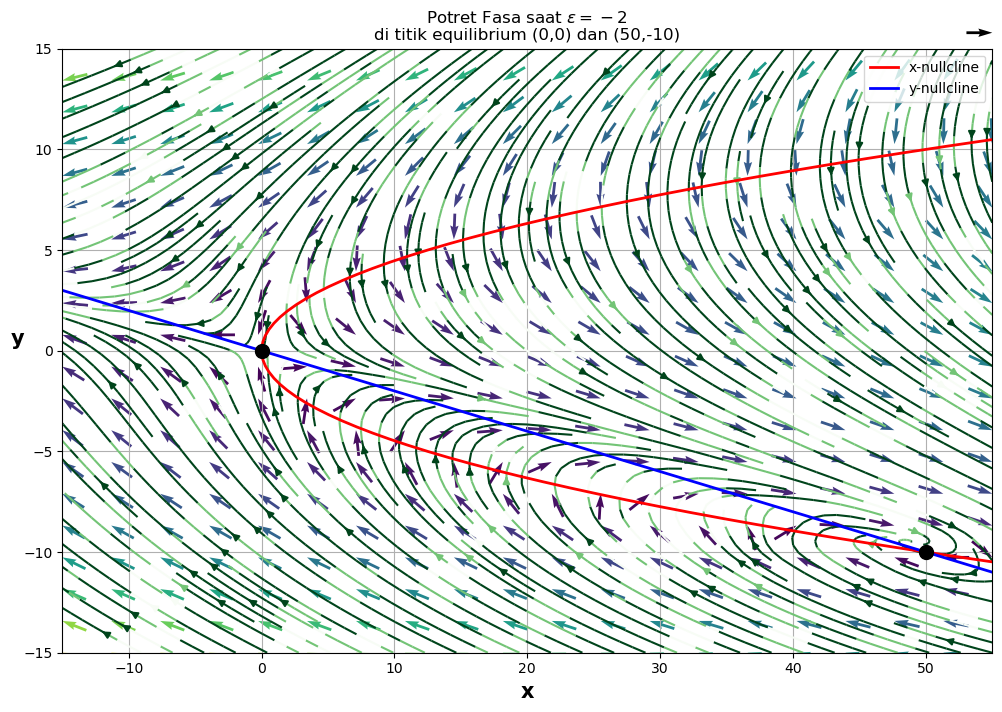

In [22]:
epsilon = -2
f = lambda x,y : -2*(1+epsilon)*x-y**2               #dx/dt
g = lambda x,y : -x+(2*epsilon-1)*y                  #dy/dt
Sys0 = np.array([0, 0])                              #inisial awal dalam menggambar plot predator prey
t_kiri, t_kanan = 0,100                              #waktu awal hingga akhir dalam menggambar plot predator prey
x_kiri,x_kanan,y_kiri,y_kanan = -15,55,-15,15        #interval x dan y dalam menggambar potrait phase
nullcline_x_1,nullcline_x_2 = lambda x,y: -y**2/(2+2*epsilon), lambda x,y: y     #titik-titik nullcline dari x diperoleh saat dx/dt=0
nullcline_y_1,nullcline_y_2 = lambda x,y: x, lambda x,y: x/(2*epsilon-1)         #titik-titik nullcline dari y diperoleh saat dy/dt=0
judul = "Potret Fasa saat $\epsilon = {}$".format(epsilon)+'\ndi titik equilibrium (0,0) dan ({},{})'.format(-2*(1+epsilon)*(2*epsilon-1)**2
                                                      ,-2*(1+epsilon)*(2*epsilon-1))
simpan = False                                       #simpan gambar True/False

sisdin(f,g,Sys0,t_kiri,t_kanan,x_kiri,x_kanan,y_kiri,y_kanan,nullcline_x_1,nullcline_x_2,nullcline_y_1,nullcline_y_2,judul,simpan)

[(-3.0, -2.0), (-3.0, 1.0), (-3.0, 2.0), (-3.0, -0.8685170918213297), (-3.0, 1.5351837584879964)] 

Check the fixed point  (-3.00000, -2.00000)
The real part of the first eigenvalue is -1440.000000
The real part of the second eigenvalue is -4.000000
The fixed point in (-3.00000, -2.00000) is a sink. It is stable
Jacobian in point (-3.00000, -2.00000) = 
 [[   -4.     0.]
 [    0. -1440.]]
-------------------------------------------------------------
Check the fixed point  (-3.00000, 1.00000)
The real part of the first eigenvalue is -90.000000
The real part of the second eigenvalue is -4.000000
The fixed point in (-3.00000, 1.00000) is a sink. It is stable
Jacobian in point (-3.00000, 1.00000) = 
 [[ -4.   0.]
 [  0. -90.]]
-------------------------------------------------------------
Check the fixed point  (-3.00000, 2.00000)
The real part of the first eigenvalue is -160.000000
The real part of the second eigenvalue is -4.000000
The fixed point in (-3.00000, 2.00000) is a sink. It is s

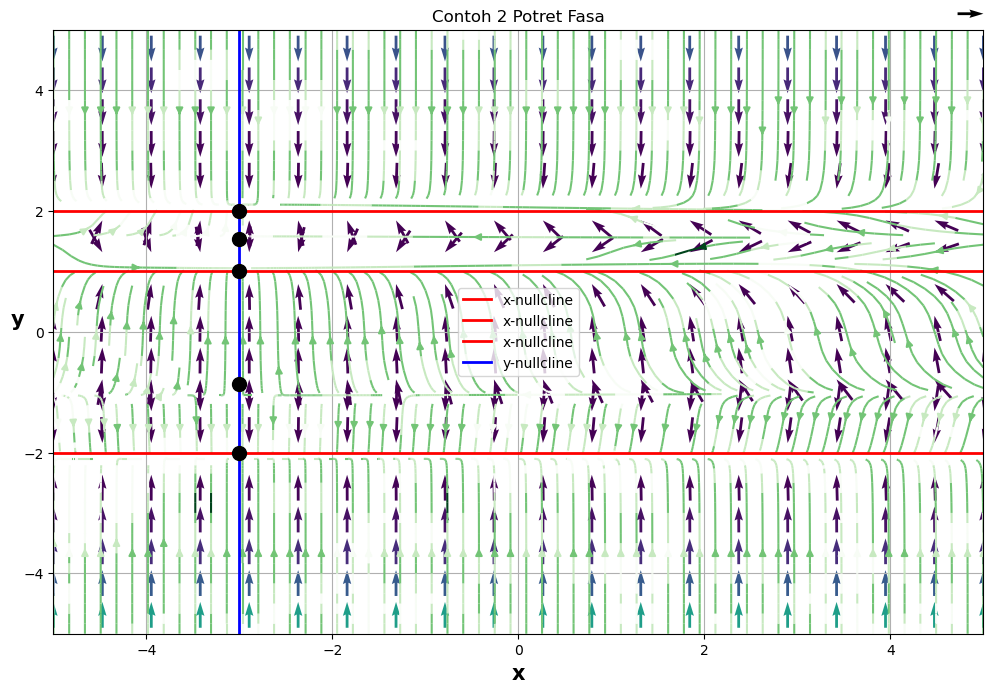

In [87]:
f = lambda x,y : -4*(x+3)                                                                    #dx/dt
g = lambda x,y : -10*(y-2)*(y-1)*(y+2)*(3*y**2-2*y-4)                                        #dy/dt
Sys0 = np.array([0, 0])                                                                      #inisial awal dalam menggambar plot predator prey
t_kiri, t_kanan = 0,20                                                                       #waktu awal hingga akhir dalam menggambar plot predator prey
x_kiri,x_kanan,y_kiri,y_kanan = -5,5,-5,5                                                    #interval x dan y dalam menggambar potrait phase
nullcline_x_1,nullcline_x_2 = lambda x,y: x, [lambda x,y: 0*x-2, lambda x,y: 0*x+1, lambda x,y: 0*x+2]  #titik-titik nullcline dari x diperoleh saat dx/dt=0
                                                                                             #karena nullcline garis x ada 3 garis yakni y=-2,-1,2.
nullcline_y_1,nullcline_y_2 = lambda x,y: 0*x-3, lambda x,y: y                               #titik-titik nullcline dari y diperoleh saat dy/dt=0
judul = "Contoh 2 Potret Fasa"
simpan = False                                                                               #simpan gambar True/False

sisdin(f,g,Sys0,t_kiri,t_kanan,x_kiri,x_kanan,y_kiri,y_kanan,nullcline_x_1,nullcline_x_2,nullcline_y_1,nullcline_y_2,judul,simpan)